KELOMPOK 6 - DEVISVE CLUSTERING

---

In [31]:
# Library Import
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels
import statsmodels.api as sm

In [32]:
df = pd.read_csv('data_penjualan.csv', delimiter=';')

df.head()


,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000,1800,1800000
1,05/08/2022,FoodpakMatte245,1000,1900,1900000
2,05/08/2022,CraftLaminasi290,5000,750,3750000
3,05/08/2022,CraftLaminasi290,1000,1200,1200000
4,07/08/2022,Dupleks310,1000,1550,1550000


In [33]:
# Data Preprocessing
df = df.drop_duplicates()
# Cek missing value dan isi dengan 0
df.fillna(0, inplace=True)

In [34]:
# Ubah kolom numerik ke tipe int
df[['Jumlah Order', 'Harga', 'Total']] = df[['Jumlah Order', 'Harga', 'Total']].apply(pd.to_numeric, errors='coerce')

In [35]:
# Agregasi per produk
data_produk = df.groupby('Jenis Produk')[['Jumlah Order', 'Harga', 'Total']].mean()
print(data_produk.head())

                       Jumlah Order   Harga      Total
Jenis Produk                                          
245                          1000.0  1000.0  1000000.0
260Glossy                    2000.0  2300.0  4600000.0
BOWL800ML                    1000.0  2800.0  2800000.0
Bowl650mlCIS                 5000.0  1700.0  8500000.0
CEMERLANGINDAHSELARAS        1000.0  1850.0  1850000.0


In [36]:
# Standarisasi Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_produk)

In [37]:
# Hierarchical clustering (Ward digunakan untuk divisive)

Z = linkage(aggr_df_scaled[num_cols], method='ward')


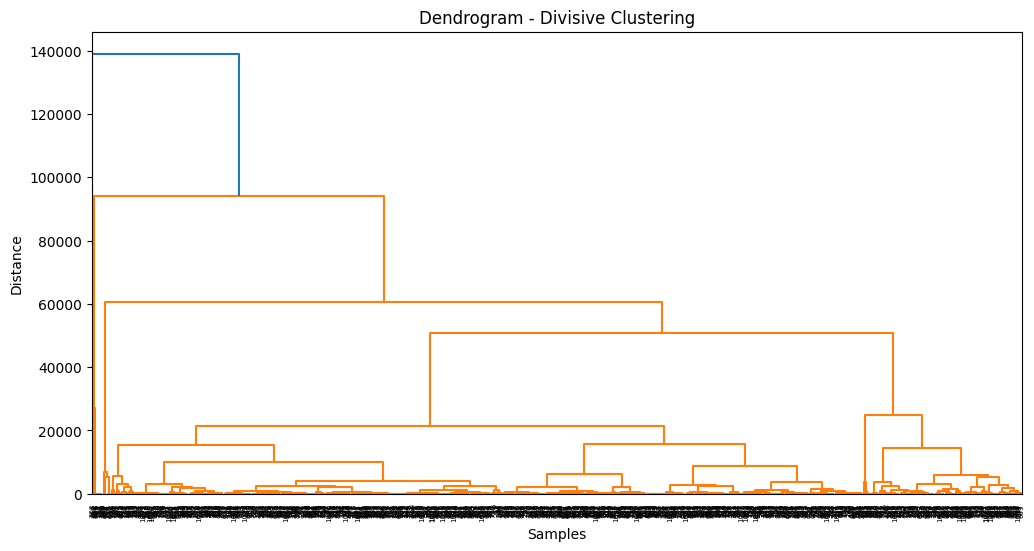

In [38]:
# Encode kolom kategori
le = LabelEncoder()
df['Jenis Produk'] = le.fit_transform(df['Jenis Produk'])

# Pilih fitur terbaik
data_for_clustering = df[['Jenis Produk', 'Jumlah Order', 'Harga']]

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(data_for_clustering, method='ward'))
plt.title("Dendrogram - Divisive Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


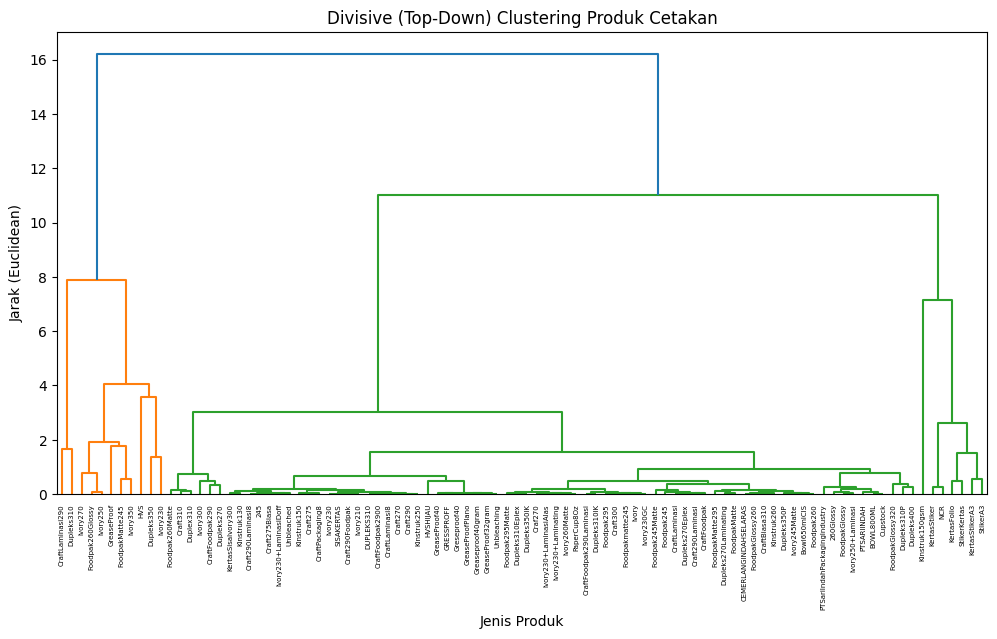

In [39]:
plt.figure(figsize=(12, 6))
sch.dendrogram(Z, labels=data_produk.index, leaf_rotation=90)
plt.title("Divisive (Top-Down) Clustering Produk Cetakan")
plt.xlabel("Jenis Produk")
plt.ylabel("Jarak (Euclidean)")
plt.show()